<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#통계적-추정" data-toc-modified-id="통계적-추정-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>통계적 추정</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#과제1-0905" data-toc-modified-id="과제1-0905-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>과제1 0905</a></span></li></ul></li><li><span><a href="#점추정" data-toc-modified-id="점추정-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>점추정</a></span></li><li><span><a href="#구간추정" data-toc-modified-id="구간추정-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>구간추정</a></span><ul class="toc-item"><li><span><a href="#과제2-0905" data-toc-modified-id="과제2-0905-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>과제2 0905</a></span></li></ul></li></ul></li><li><span><a href="#통계적-가설검정" data-toc-modified-id="통계적-가설검정-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>통계적 가설검정</a></span><ul class="toc-item"><li><span><a href="#통계적-가설검정이란?" data-toc-modified-id="통계적-가설검정이란?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>통계적 가설검정이란?</a></span><ul class="toc-item"><li><span><a href="#과제1-0907" data-toc-modified-id="과제1-0907-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>과제1 0907</a></span></li><li><span><a href="#과제2-0907" data-toc-modified-id="과제2-0907-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>과제2 0907</a></span></li></ul></li></ul></li></ul></div>

## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

####  과제1 0905
p266~p291

In [10]:
df = pd.read_csv('./data/ch4_scores400.csv')
print(df.head())
scores = np.array(df['score'])
df.shape

   score
0     76
1     55
2     80
3     80
4     74


(400, 1)

In [9]:
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

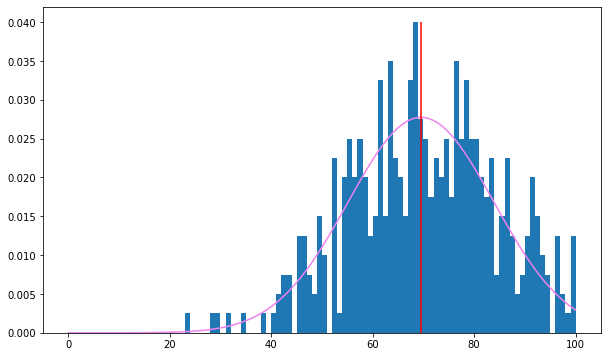

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs=np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='violet')
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.vlines(p_mean, 0,0.04, color='red' )

plt.show()

In [13]:
# A 학생이 무작위 추출한 크기가 20인 표본
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [17]:
# 표본의 크기가 20인 표본 10000개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

### 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [23]:
df = pd.read_csv('./data/ch4_scores400.csv')
print('모평균:', df.score.mean())

np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

sample_means = np.mean(samples, axis=1)

print('모분산:', df.score.var())
sample_u_vars = np.var(samples, axis=1, ddof=1)  # ddof=1 불편분산
print('표본분산, 분산:', np.mean(sample_means), np.mean(sample_u_vars))

모평균: 69.53
모분산: 207.1870676691731
표본분산, 분산: 69.53799999999998 206.67808263157895


In [24]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


In [28]:
# 표본의 평균
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.538

In [29]:
# 표본의 크기를 1000000으로 할 때의 표본평균
np.mean(np.random.choice(scores, int(1e6)))

69.530

In [32]:
# A 학생이 추출한 표본의 표본평균
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
s_mean = np.mean(sample)
s_mean

70.400

In [33]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [31]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.344

In [ ]:
# 표본분산의 과소추정을 보정해주기위해 분편분산을 씀 

In [34]:
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.678

In [35]:
np.var(np.random.choice(scores, int(1e6)), ddof=1) # 1000000개의 표본분산, 표본이 클수록 수렴성을 보임 

207.128

In [36]:
u_var = np.var(sample, ddof=1) # 표본분산 1개는 모분산과 차이가 클 수 있음
u_var

158.253

### 구간추정

In [58]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)
lcl, ucl

(64.100, 76.700)

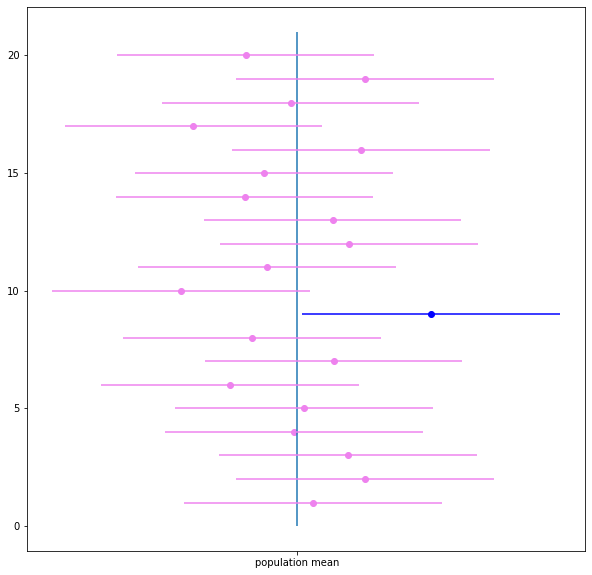

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_- rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_- rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='violet')
        ax.hlines(n_samples-i, lcl, ucl, color='violet')
    else: 
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [62]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt +=1
cnt / len(samples)

0.951

In [63]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

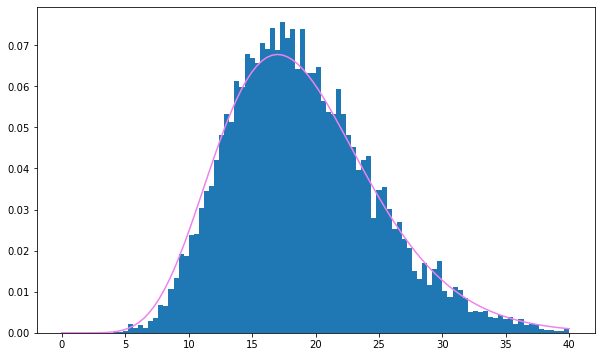

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv =stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='violet')
hist, _, _ = ax.hist(sample_y, bins=100, range=(0,40), density=True)

plt.show()

In [66]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
ucl = (n-1) * u_var / rv.isf(0.975)

lcl, ucl

(91.525, 337.596)

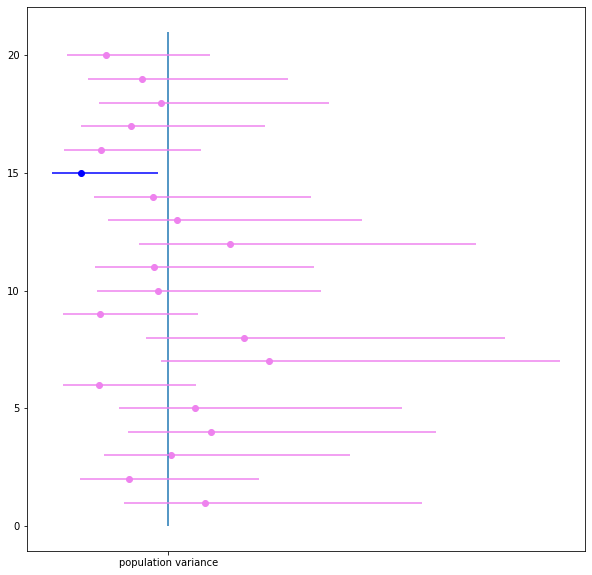

In [70]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='violet')
        ax.hlines(n_samples-i, lcl, ucl, 'violet')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [73]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt +=1

cnt / len(samples)

0.964

In [75]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl,ucl

(64.512, 76.288)

In [76]:
enquete_df = pd.read_csv('./data/ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [77]:
s_mean = enquete.mean()
s_mean

0.709

In [78]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1 -s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1 -s_mean)/n)

lcl, ucl

(0.681, 0.737)

In [80]:
n_access_df = pd.read_csv('./data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [81]:
s_mean = n_access.mean()
s_mean

10.444

In [83]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.698, 11.191)

#### 과제2 0905
- 다음 용어를 예를들어 설명하세요.불편성, 일치성, 불편분산
- 카이제곱분포, t분포가 구강추정에 활용된 사례를 만들어 설명하세요 ( 카이제곱분포는 모분산을 알때 모평균 구할 때 썼음, t분포는 모분산을 모를때 모평균 구할 때 썼음 )

In [4]:
import pandas as pd
import numpy as np

In [11]:
# 불편성 
# '추정량의 기댓값'이 추측하려는 모수가 되는 성질
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])

# 표본 크기 20인 표본 10000개
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

# 표본 크기가 20인 표본중 5개
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

# 크기가 20인 표본평균 10000개의 평균    
print('표본평균들의 평균:', np.mean(samples))

# 모평균
print('모평균:',np.mean(scores))



1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650
표본평균들의 평균: 69.538
모평균: 69.53


In [12]:
# 일치성
# 표본 크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질

# 모평균
print('모평균:',np.mean(scores))

# 표본의 크기가 커지면 표본평균은 모평균에 수렴 >> 대수의 법칙을 사용하여 보임.
print('표본크기 100000   표본평균:',np.mean(np.random.choice(scores, int(1e5))))
print('표본크기 1000000  표본평균:',np.mean(np.random.choice(scores, int(1e6))))
print('표본크기 10000000 표본평균:',np.mean(np.random.choice(scores, int(1e7))))

모평균: 69.53
표본크기 100000   표본평균: 69.50824
표본크기 1000000  표본평균: 69.544308
표본크기 10000000 표본평균: 69.5357552


In [ ]:
불편분산
n은 자유도, 자유롭게 취할 수 있는 변수의 개수
표본분산에서 나누는 수 n 을 n-1로함
표본평균은 식 안의 변수에 제약이 없음, 자유도 = n
표본분산은 식 안의 변수에 제약이 하나 생김, 자유도 = n-1

In [ ]:
카이제곱분포, t분포가 구강추정에 활용된 사례를 만들어 설명하세요 ( 카이제곱분포는 모분산을 알때 모평균 구할 때 썼음 // t분포는 표본크기<30, 모분산을 모를때 모평균 구할 때 썼음 )


## 통계적 가설검정

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
%precision 3

'%.3f'

<img src = './data/오류.png' STYLE='width:400px;'>
<img src = './data/오류의 크기.png' STYLE='width:800px;'>

In [9]:
# 감자튀김의 무게 데이터
np.random.seed(1111)
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])

In [10]:
# 표본평균
s_mean = np.mean(sample)
s_mean

128.451

### 통계적 가설검정이란?
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준


In [11]:
# 모평균이 알려진 감자튀김 무게 평균이 130g보다 적은지 여부(모집단이 정규분포를 따르고 모분산은 9)
rv = stats.norm(130, np.sqrt(9/14))
print(rv.mean(), rv.std())
print(rv.rvs(10))
print(rv.isf(0.95))

130.0 0.8017837257372732
[128.958 129.14  130.634 129.296 131.204 129.981 130.221 129.225 128.733
 129.837]
128.68118313069039


<bound method _AxesBase.set_ylim of <AxesSubplot:xlabel='x', ylabel='pdf'>>

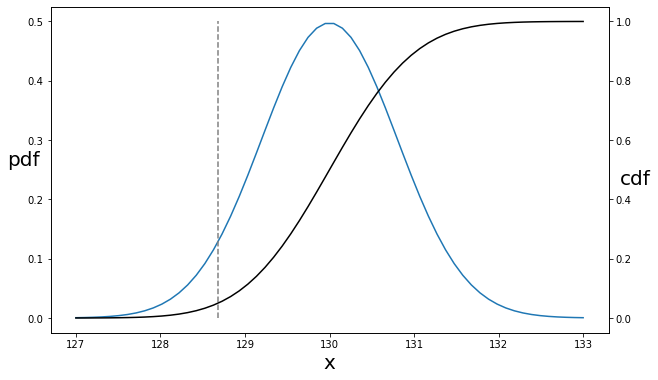

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)

ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='black')
ax1.vlines(rv.ppf(0.05), 0,0.5, color='gray',ls='--')# ppf(0.05) = isf(0.95)
ax1.set_xlabel("x",fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)#확률밀도함수
ax2.set_ylabel('cdf',rotation=0,fontsize=20)#누적분포함수 누적밀도함수
ax1.set_ylim


In [13]:
# 검정통계량 z : 표본평균을 표준화
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932

In [14]:
# 임곗값
rv = stats.norm()
rv.isf(0.95)

-1.645

In [15]:
# 검정통계량으로부터 p값 산출
# p값이 유의수준 0.05보다 작으므로 귀무가설 기각
rv.cdf(z)

0.027

In [ ]:
# 귀무가설을 기각한다. = 귀무가설이 옳지 않다.
# 귀무가설을 채택한다. = 귀무가설이 옳지 않다고 말할 수 없다. (확률적 접근 아닐가능성이 크다.)


단측검정과 양측검정
귀무가설 : 감자튀김의 무게는 130g이다. (차이가없다? 효과가 없다?이 말이 이해가 안되네)
- 단측검정 : 감자튀김의 무게가 130g보다 작다를 대립가설로 수행
- 양측검정 : 감자튀김의 무게는 130g이 아니다를 대립가설로 수행

대립가설 : 감자튀김의 무게는 130g보다 작다. (차이가 있다? 효과가있다?) 

In [16]:
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932

In [17]:
rv = stats.norm()
rv.interval(0.95)

(-1.960, 1.960)

In [18]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
rv.cdf(z)*2

0.053

가설검정에서의 두 가지 오류
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - '실제로 평균이 130g'인데도 평균은 130g 보다 작다라는 결론을 내리는 상황 
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - '모평균은 130g 보다 작다'인데도 모평균은 130g 보다 작다라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만 제2종 오류는 제어할 수 없는 비대칭성이 있다.


In [19]:
# 실제로 평균은 130g인 상황 고려 N(130, 9)
rv = stats.norm(130, 3)

In [24]:
# 1종 오류를 범할 비율 : 위험률  = 유의수준과 일치하므로 분석가가 제어할 수 있는 확률임
c = stats.norm().isf(0.95) # 표준정규분포에서 임곗값
n_samples = 10000 # 10000개의 샘플
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14) #정규화
    if z < c: # 검정통계량 < 임곗값
        cnt +=1
cnt / n_samples  

0.051

In [27]:
# 2종 오류를 범하는 비율 : 1-베타, 검정력, 분석가가 제어할 수 없는 확률
rv = stats.norm(128,3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c: # 검정통계량 >= 임곗값
        cnt +=1
cnt / n_samples

0.194

#### 과제1 0907
p308~p331 예제 풀기 (윌콕슨, 만-위트니 제외)

카이제곱검정
- 독립성 검정이란 두 변수 'X,Y에 관해서 X와 Y가 독립이다.'라는 귀무가설과 'X,Y에 관해서 X와 Y가 독립이 아니다.'라는 대립가설에 의해 수행되는 검정
- 독립성 검정에 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 부른다.
- 광고A와 광고B간의 구입 비율에 유의한 차이가 있는지 확인하는 경우 사용할 수 있음.


In [28]:
ad_df = pd.read_csv('data/ch11_ad.csv')
n = len(ad_df)
print(n)
ad_df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [30]:
# 교차집계표
ad_cross = pd.crosstab(ad_df['광고'], ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [32]:
ad_cross['했다'] / (ad_cross['했다'] + ad_cross['하지 않았다'])

광고
A    0.1225
B    0.0850
dtype: float64

In [33]:
n_not, n_yes = ad_cross.sum()
n_not, n_yes

(900, 100)

In [34]:
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(400, 600)

In [36]:
# 기대도수
ad_ef = pd.DataFrame({'했다':[n_adA * n_yes / n, n_adB * n_yes / n],'하지 않았다':[n_adA * n_not / n, n_adB * n_not / n]}, index=['A','B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [40]:
# 기대도수와 관측도수의 차이를 측정함으로써 검정수행
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

3.750

In [41]:
# p값이 0.05보다 큼, 귀무가설 채택, 광고A와 광고B의 유의한 차이가 인정되지 않는다는 결론.
rv = stats.chi2(1)
1 - rv.cdf(y)

0.053

In [42]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2, p, dof

(3.750, 0.053, 1)

In [44]:
ef

array([[360.,  40.],
       [540.,  60.]])

#### 과제2 0907
카이제곱 검정을 사용하여 독립성 검정을 수행하는 사례를 작성하여 설명하세요.